# Creating a Filter, Edge Detection

### Import resources and display image

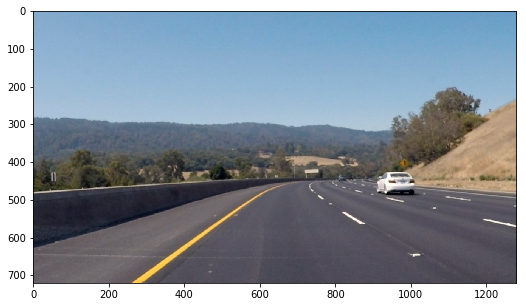

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.figure(figsize=(10,5))
plt.imshow(image)

### Convert the image to grayscale

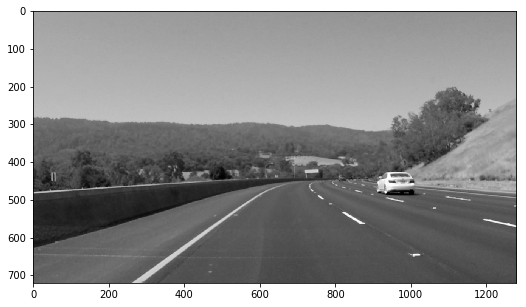

In [35]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,5))
plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

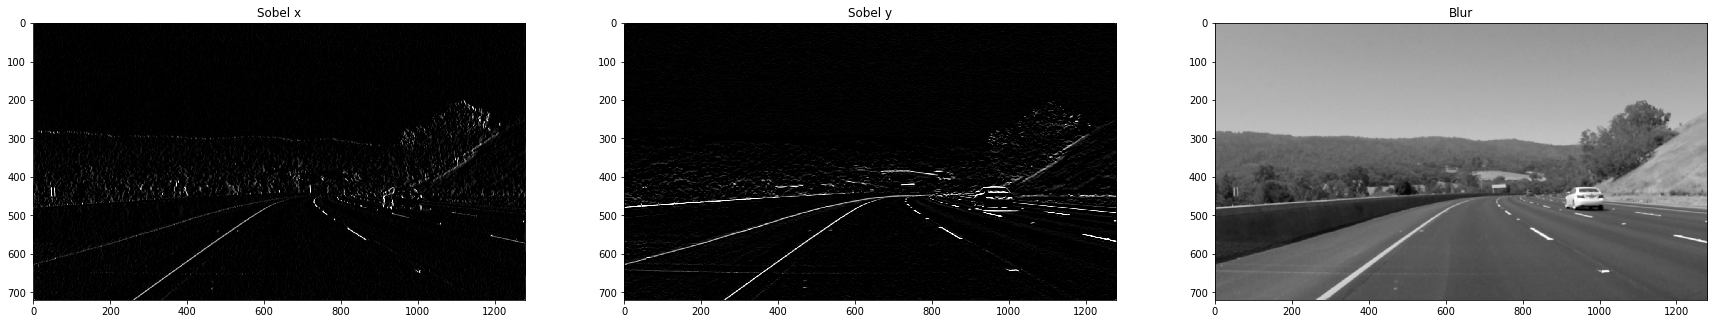

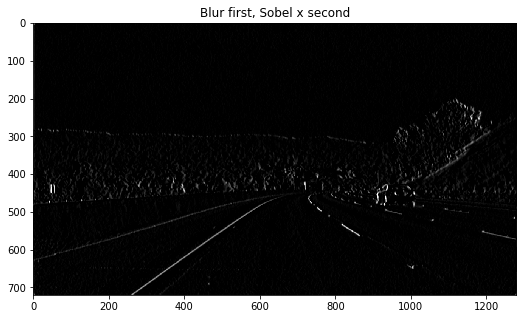

In [36]:
# Create a custom kernel (mean)
#  1/9 * [[1, 1, 1]
#         [1, 1, 1]
#         [1, 1, 1]]
blur_filter = np.array([[1/9.0, 1/9.0, 1/9.0],
                        [1/9.0, 1/9.0, 1/9.0],
                        [1/9.0, 1/9.0, 1/9.0]])

# 3x3 array for edge detection
sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_sobelx = cv2.filter2D(gray, -1, sobel_x)
filtered_image_sobely = cv2.filter2D(gray, -1, sobel_y)
filtered_image_blur   = cv2.filter2D(gray, -1, blur_filter)

filtered_image_blur_sobel_x = cv2.filter2D(cv2.filter2D(gray, -1, blur_filter), -1, sobel_x)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 20))

ax1.set_title('Sobel x')
ax1.imshow(filtered_image_sobelx, cmap='gray')

ax2.set_title('Sobel y')
ax2.imshow(filtered_image_sobely, cmap='gray')

ax3.set_title('Blur')
ax3.imshow(filtered_image_blur, cmap='gray')

plt.figure(figsize=(10, 5))
plt.title('Blur first, Sobel x second')
plt.imshow(filtered_image_blur_sobel_x, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



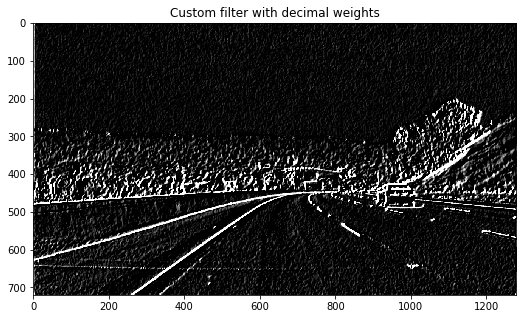

In [37]:
## TODO: Create and apply a Sobel x operator
custom_filter= np.array([[-2.5, -1.5, -3.5, 1.5, 2.5],
                         [-2.5, -1.5, -3.5, 1.5, 2.5],
                         [-3.5, -3.5,    0, 3.5, 3.5],
                         [-2.5, -1.5,  3.5, 1.5, 2.5],
                         [-2.5, -1.5,  3.5, 1.5, 2.5]])

filtered_image = cv2.filter2D(gray, -1, custom_filter)
plt.figure(figsize=(10, 5))
plt.title('Custom filter with decimal weights')
plt.imshow(filtered_image, cmap='gray')